# 1 load data and perform initial exploration 

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import os
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load the dataset (adjust paths as needed)
# Example for loading articles and propaganda spans

# articles_path = "path/to/articles"
# spans_path = "path/to/spans"

articles_path = "/Users/home/VSCode/mids/266_fp/data/semeval2020-task11/datasets/train-articles" # train
# articles_path = "/Users/home/VSCode/mids/266_fp/data/semeval2020-task11/datasets/dev-articles" # dev
spans_path = "/Users/home/VSCode/mids/266_fp/data/semeval2020-task11/datasets/train-labels-task1-span-identification"


def load_semeval_data(articles_dir, spans_dir):
    data = []
    for filename in os.listdir(articles_dir):
        if filename.endswith(".txt"):
            article_id = filename.split(".")[0]
            
            # Load article text
            with open(os.path.join(articles_dir, filename), 'r', encoding='utf-8') as f:
                article_text = f.read()
            
            # Load spans if available
            spans_file = os.path.join(spans_dir, article_id + ".task1-SI.labels")
            spans = []
            if os.path.exists(spans_file):
                with open(spans_file, 'r', encoding='utf-8') as f:
                    for line in f:
                        parts = line.strip().split('\t')
                        if len(parts) >= 3:
                            spans.append({
                                'start': int(parts[1]),
                                'end': int(parts[2]),
                                'text': article_text[int(parts[1]):int(parts[2])]
                            })
            
            data.append({
                'article_id': article_id,
                'text': article_text,
                'spans': spans
            })
    
    return data

# Load the data
propaganda_data = load_semeval_data(articles_path, spans_path)

# Basic inspection
print(f"Number of articles: {len(propaganda_data)}")
if propaganda_data:
    print(f"Example article length: {len(propaganda_data[0]['text'])}")
    print(f"Number of propaganda spans in first article: {len(propaganda_data[0]['spans'])}")

Number of articles: 371
Example article length: 6254
Number of propaganda spans in first article: 26


[nltk_data] Downloading package punkt to /Users/home/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/home/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# step 2 analyze propaganda techniques distribution

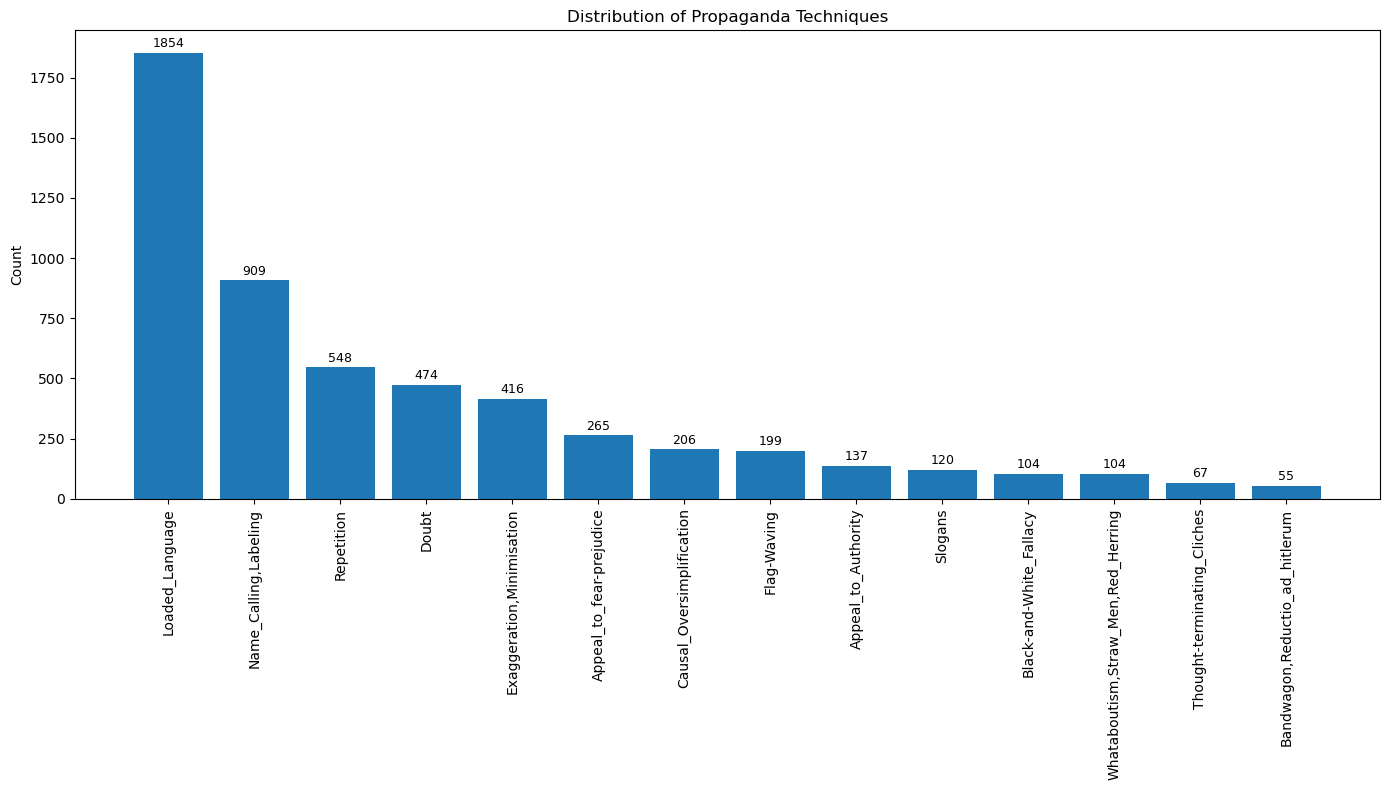

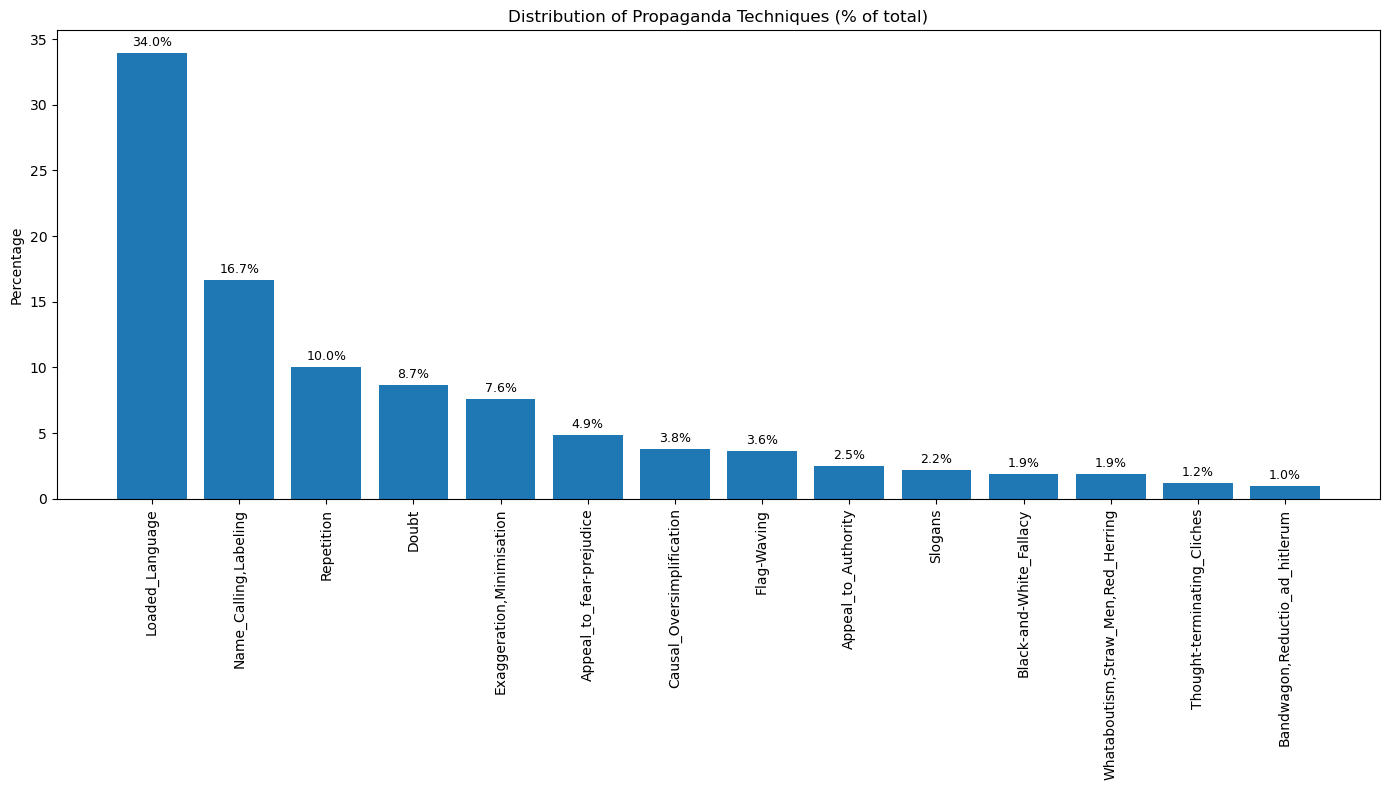

Total propaganda techniques identified: 5458
Number of unique techniques: 14

All propaganda techniques by count:
- Loaded_Language: 1854 instances
- Name_Calling,Labeling: 909 instances
- Repetition: 548 instances
- Doubt: 474 instances
- Exaggeration,Minimisation: 416 instances
- Appeal_to_fear-prejudice: 265 instances
- Causal_Oversimplification: 206 instances
- Flag-Waving: 199 instances
- Appeal_to_Authority: 137 instances
- Slogans: 120 instances
- Black-and-White_Fallacy: 104 instances
- Whataboutism,Straw_Men,Red_Herring: 104 instances
- Thought-terminating_Cliches: 67 instances
- Bandwagon,Reductio_ad_hitlerum: 55 instances

All propaganda techniques by percentage:
- Loaded_Language: 34.0%
- Name_Calling,Labeling: 16.7%
- Repetition: 10.0%
- Doubt: 8.7%
- Exaggeration,Minimisation: 7.6%
- Appeal_to_fear-prejudice: 4.9%
- Causal_Oversimplification: 3.8%
- Flag-Waving: 3.6%
- Appeal_to_Authority: 2.5%
- Slogans: 2.2%
- Black-and-White_Fallacy: 1.9%
- Whataboutism,Straw_Men,Red_H

In [22]:
# Load techniques data (adjust path as needed)
techniques_path = "/Users/home/VSCode/mids/266_fp/data/semeval2020-task11/datasets/train-labels-task2-technique-classification"

def load_techniques(techniques_dir, data):
    for item in data:
        article_id = item['article_id']
        techniques_file = os.path.join(techniques_dir, article_id + ".task2-TC.labels")
        
        if os.path.exists(techniques_file):
            with open(techniques_file, 'r', encoding='utf-8') as f:
                for line in f:
                    parts = line.strip().split('\t')
                    if len(parts) >= 4:
                        start, end = int(parts[2]), int(parts[3])
                        technique = parts[1]
                        
                        # Find matching span
                        for span in item['spans']:
                            if span['start'] == start and span['end'] == end:
                                span['technique'] = technique
                                break
    
    return data

# Load technique labels
propaganda_data = load_techniques(techniques_path, propaganda_data)

# Count techniques
all_techniques = []
for item in propaganda_data:
    for span in item['spans']:
        if 'technique' in span:
            all_techniques.append(span['technique'])

technique_counts = Counter(all_techniques)

# Sort techniques by count in descending order
sorted_counts = dict(sorted(technique_counts.items(), key=lambda x: x[1], reverse=True))

# Visualize technique distribution
plt.figure(figsize=(14, 8))
bars = plt.bar(sorted_counts.keys(), sorted_counts.values())

# Add count annotations on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 10,
             f'{int(height)}', ha='center', va='bottom', rotation=0, fontsize=9)

plt.xticks(rotation=90)
plt.title('Distribution of Propaganda Techniques')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Calculate percentage of each technique
total_techniques = sum(technique_counts.values())
technique_percentages = {k: (v/total_techniques)*100 for k, v in technique_counts.items()}

# Sort by frequency for better visualization
sorted_techniques = dict(sorted(technique_percentages.items(), key=lambda item: item[1], reverse=True))

# Create bar plot with percentages
plt.figure(figsize=(14, 8))
bars = plt.bar(sorted_techniques.keys(), sorted_techniques.values())

# Add percentage labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.3,
             f'{height:.1f}%', ha='center', va='bottom', rotation=0, fontsize=9)

plt.xticks(rotation=90)
plt.title('Distribution of Propaganda Techniques (% of total)')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


# Print summary statistics
total_techniques = sum(technique_counts.values())
print(f"Total propaganda techniques identified: {total_techniques}")
print(f"Number of unique techniques: {len(technique_counts)}")

# Print all techniques by count (from greatest to smallest)
print("\nAll propaganda techniques by count:")
for technique, count in list(sorted_counts.items()):
    print(f"- {technique}: {count} instances")

# Print all techniques by percentage (from greatest to smallest)
print("\nAll propaganda techniques by percentage:")
for technique, count in list(sorted_counts.items()):
    percentage = (count/total_techniques) * 100
    print(f"- {technique}: {percentage:.1f}%")

# step 3 text analysis and feature extraction

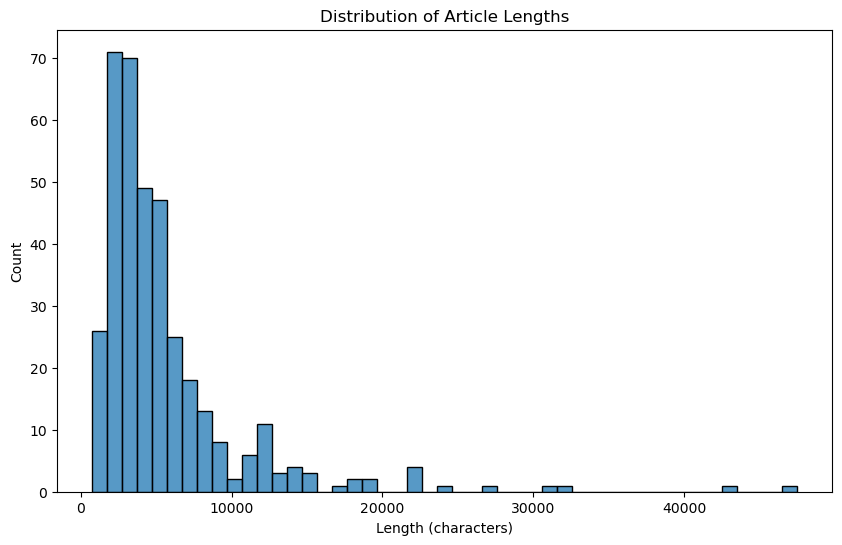

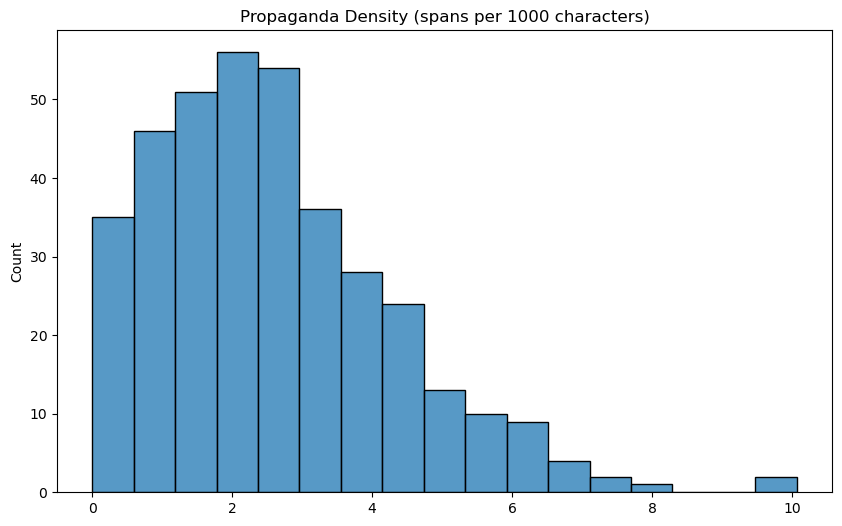

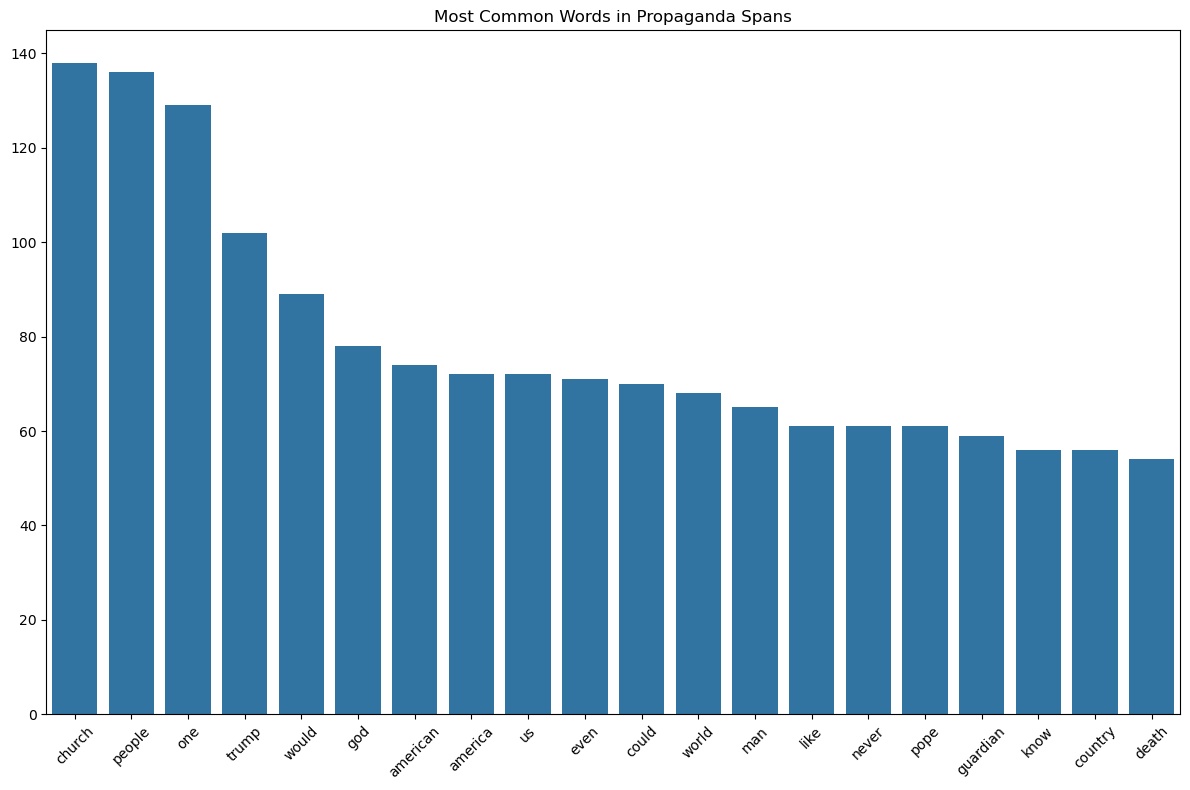

In [23]:
# Text statistics
article_lengths = [len(item['text']) for item in propaganda_data]
spans_per_article = [len(item['spans']) for item in propaganda_data]

# Visualize article length distribution
plt.figure(figsize=(10, 6))
sns.histplot(article_lengths)
plt.title('Distribution of Article Lengths')
plt.xlabel('Length (characters)')
plt.show()

# Visualize propaganda density
propaganda_density = [spans/len(item['text'])*1000 for item, spans in zip(propaganda_data, spans_per_article)]
plt.figure(figsize=(10, 6))
sns.histplot(propaganda_density)
plt.title('Propaganda Density (spans per 1000 characters)')
plt.show()

# Word frequency analysis in propaganda spans
stop_words = set(stopwords.words('english'))
propaganda_words = []

for item in propaganda_data:
    for span in item['spans']:
        if 'text' in span:
            words = word_tokenize(span['text'].lower())
            words = [word for word in words if word.isalpha() and word not in stop_words]
            propaganda_words.extend(words)

word_freq = Counter(propaganda_words)
most_common_words = word_freq.most_common(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=[word[0] for word in most_common_words], y=[word[1] for word in most_common_words])
plt.xticks(rotation=45)
plt.title('Most Common Words in Propaganda Spans')
plt.tight_layout()
plt.show()

# step 4 analyze span lengths by technique

/var/folders/s5/wy3v1qld49g1_k9blxktj0t80000gn/T/ipykernel_48319/1810472347.py:23: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=labels)


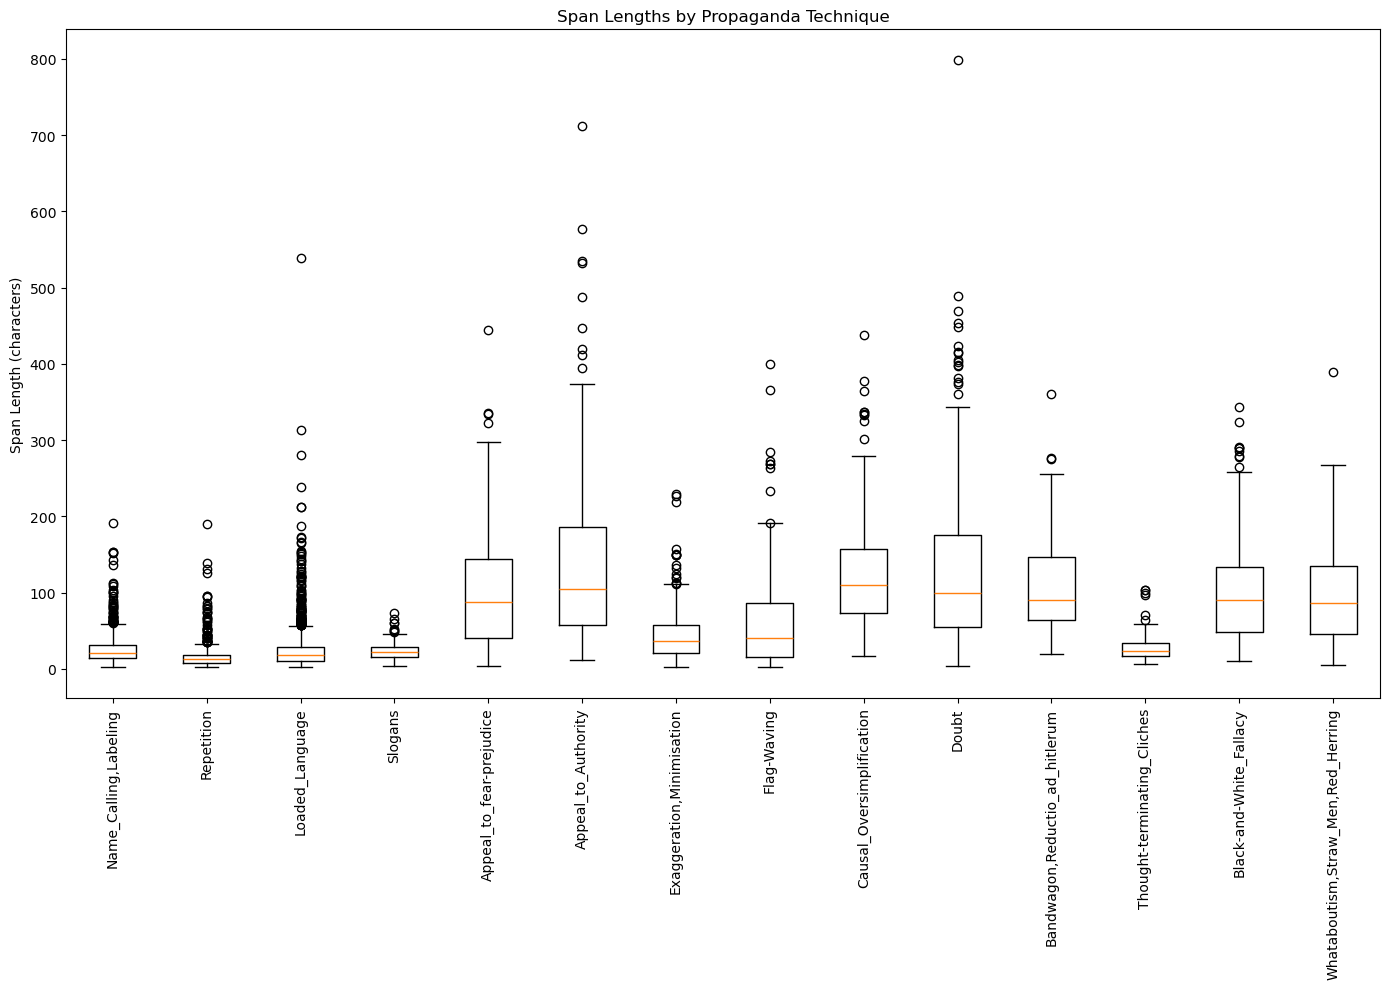

In [24]:
# Calculate span lengths by technique
technique_span_lengths = {}

for item in propaganda_data:
    for span in item['spans']:
        if 'technique' in span and 'text' in span:
            technique = span['technique']
            length = len(span['text'])
            
            if technique not in technique_span_lengths:
                technique_span_lengths[technique] = []
            
            technique_span_lengths[technique].append(length)

# Create boxplot of span lengths by technique
plt.figure(figsize=(14, 10))
data = []
labels = []
for technique, lengths in technique_span_lengths.items():
    data.append(lengths)
    labels.append(technique)

plt.boxplot(data, labels=labels)
plt.xticks(rotation=90)
plt.title('Span Lengths by Propaganda Technique')
plt.ylabel('Span Length (characters)')
plt.tight_layout()
plt.show()


Article Length Statistics (in words):
Min (0%): 119 words
Q1 (25%): 512 words
Median (50%): 792 words
Q3 (75%): 1196 words
Max (100%): 8796 words
Mean: 1075 words

Articles exceeding GLiNER's 384-word limit: 334 (90.0%)


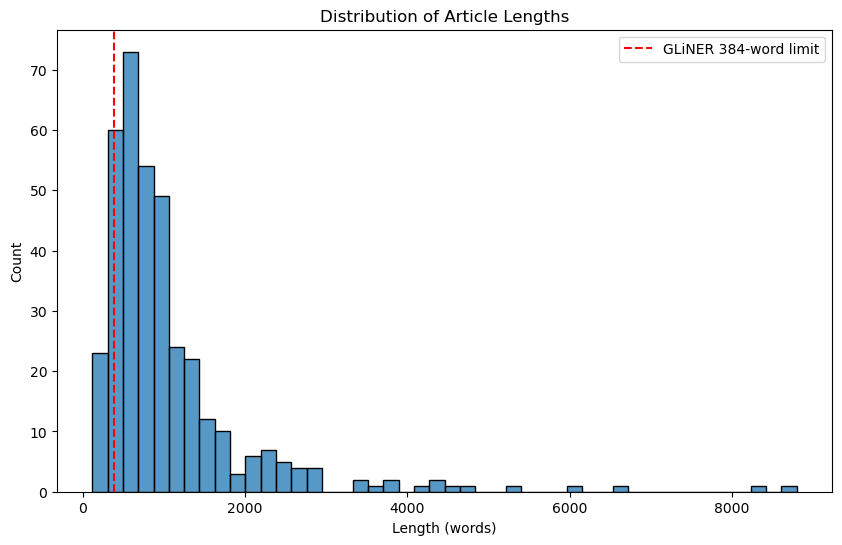

In [25]:
# Text statistics - calculating lengths in words instead of characters
from nltk.tokenize import word_tokenize

# Calculate article lengths in words
article_lengths_words = []
for item in propaganda_data:
    words = word_tokenize(item['text'])
    article_lengths_words.append(len(words))

# Calculate and print quartiles
word_count_quartiles = np.percentile(article_lengths_words, [0, 25, 50, 75, 100])
print("\nArticle Length Statistics (in words):")
print(f"Min (0%): {word_count_quartiles[0]:.0f} words")
print(f"Q1 (25%): {word_count_quartiles[1]:.0f} words")
print(f"Median (50%): {word_count_quartiles[2]:.0f} words")
print(f"Q3 (75%): {word_count_quartiles[3]:.0f} words")
print(f"Max (100%): {word_count_quartiles[4]:.0f} words")
print(f"Mean: {np.mean(article_lengths_words):.0f} words")

# Calculate proportion exceeding GLiNER's 384-word limit
over_limit = sum(1 for length in article_lengths_words if length > 384)
percent_over_limit = (over_limit / len(article_lengths_words)) * 100
print(f"\nArticles exceeding GLiNER's 384-word limit: {over_limit} ({percent_over_limit:.1f}%)")

# Visualize article length distribution in words
plt.figure(figsize=(10, 6))
sns.histplot(article_lengths_words)
plt.axvline(x=384, color='r', linestyle='--', label='GLiNER 384-word limit')
plt.title('Distribution of Article Lengths')
plt.xlabel('Length (words)')
plt.legend()
plt.show()

# step 5 contextual analysis

In [26]:
# Function to extract context around propaganda spans
def extract_context(text, start, end, context_size=50):
    context_start = max(0, start - context_size)
    context_end = min(len(text), end + context_size)
    
    left_context = text[context_start:start]
    span = text[start:end]
    right_context = text[end:context_end]
    
    return left_context, span, right_context

# Analyze context for a specific technique
technique_to_analyze = "Loaded_Language"  # Replace with an actual technique from your dataset
contexts = []

for item in propaganda_data:
    for span in item['spans']:
        if 'technique' in span and span['technique'] == technique_to_analyze:
            left, prop, right = extract_context(item['text'], span['start'], span['end'])
            contexts.append((left, prop, right))

# Display some examples
if contexts:
    for i, (left, prop, right) in enumerate(contexts[:5]):
        print(f"Example {i+1}:")
        print(f"Left context: ...{left}")
        print(f"Propaganda span: [{prop}]")
        print(f"Right context: {right}...")
        print()

Example 1:
Left context: ...osting (on Zakkout’s personal Facebook page) of a 
Propaganda span: [grotesque]
Right context:  cartoon containing a worried-looking religious Je...

Example 2:
Left context: ...he AMANA website.
The ADL described the video as “
Propaganda span: [venomous]
Right context: .” Currently, AMANA’s official website contains on...

Example 3:
Left context: ...im community of South Florida, Sofian Zakkout, is 
Propaganda span: [enamored]
Right context:  with Duke and has been promoting Duke’s bigoted w...

Example 4:
Left context: ...al Racist Jewish Supremacists Who Orchestrate the 
Propaganda span: [Destruction]
Right context:  of European Mankind…’ Above the posting, Zakkout ...

Example 5:
Left context: ...acebook a Duke video, within which Duke makes the 
Propaganda span: [wild]
Right context:  claim that there has been a “complete takeover of...



# gliner testing

# 1. import

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from tqdm.notebook import tqdm
import json
from sklearn.metrics import classification_report, confusion_matrix

# Import GLiNER
from gliner import GLiNER

In [28]:
from gliner import GLiNER

# model = GLiNER.from_pretrained("urchade/gliner_large-v2.1")
# model = GLiNER.from_pretrained("knowledgator/gliner-multitask-v1.0")

model = GLiNER.from_pretrained("knowledgator/gliner-llama-multitask-1B-v1.0")


text = """
Cristiano Ronaldo dos Santos Aveiro (Portuguese pronunciation: [kɾiʃˈtjɐnu ʁɔˈnaldu]; born 5 February 1985) is a Portuguese professional footballer who plays as a forward for and captains both Saudi Pro League club Al Nassr and the Portugal national team. Widely regarded as one of the greatest players of all time, Ronaldo has won five Ballon d'Or awards,[note 3] a record three UEFA Men's Player of the Year Awards, and four European Golden Shoes, the most by a European player. He has won 33 trophies in his career, including seven league titles, five UEFA Champions Leagues, the UEFA European Championship and the UEFA Nations League. Ronaldo holds the records for most appearances (183), goals (140) and assists (42) in the Champions League, goals in the European Championship (14), international goals (128) and international appearances (205). He is one of the few players to have made over 1,200 professional career appearances, the most by an outfield player, and has scored over 850 official senior career goals for club and country, making him the top goalscorer of all time.
"""

labels = ["person", "award", "date", "competitions", "teams"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"])



Fetching 9 files: 100%|██████████| 9/9 [07:25<00:00, 49.46s/it] 
/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/gliner/model.py:91: UserWarning: Vocab size of the model (32002) does't match length of tokenizer (32003). 
                            You should to consider manually add new tokens to tokenizer or to load tokenizer with added tokens.
  warnings.warn(f"""Vocab size of the model ({config.vocab_size}) does't match length of tokenizer ({len(self.data_processor.transformer_tokenizer)}).
Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


In [29]:
# model = GLiNER.from_pretrained("urchade/gliner_large-v2.1")

text = """
Eating ass is a valid form of sex.

"""

labels = ["person", "award", "date", "competitions", "teams"]

entities = model.predict_entities(text, labels)

for entity in entities:
    print(entity["text"], "=>", entity["label"])


# 2 load dataset

In [30]:
import os

DATA_DIR = "/Users/home/VSCode/mids/266_fp/data/semeval2020-task11/datasets"
ARTICLES_DIR = os.path.join(DATA_DIR, "train-articles")
SPANS_DIR = os.path.join(DATA_DIR, "train-labels-task1-span-identification")
TECHNIQUES_DIR = os.path.join(DATA_DIR, "train-labels-task2-technique-classification")




def load_semeval_article(article_id, articles_dir=ARTICLES_DIR):
    """Load a single article text by ID."""
    article_path = os.path.join(articles_dir, f"{article_id}.txt")
    with open(article_path, 'r', encoding='utf-8') as f:
        return f.read()

def load_semeval_spans(article_id, spans_dir=SPANS_DIR):
    """Load propaganda spans for a single article."""
    spans_path = os.path.join(spans_dir, f"{article_id}.task1-SI.labels")
    spans = []
    
    if os.path.exists(spans_path):
        with open(spans_path, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) >= 3:
                    spans.append({
                        'start': int(parts[1]),
                        'end': int(parts[2])
                    })
    return spans

def load_semeval_techniques(article_id, techniques_dir=TECHNIQUES_DIR):
    """Load propaganda techniques for a single article."""
    techniques_path = os.path.join(techniques_dir, f"{article_id}.task2-TC.labels")
    techniques = []
    
    if os.path.exists(techniques_path):
        with open(techniques_path, 'r', encoding='utf-8') as f:
            for line in f:
                parts = line.strip().split('\t')
                if len(parts) >= 4:
                    techniques.append({
                        'technique': parts[1],
                        'start': int(parts[2]),
                        'end': int(parts[3])
                    })
    return techniques

# Get list of article IDs
article_ids = [f.split('.')[0] for f in os.listdir(ARTICLES_DIR) if f.endswith('.txt')]
print(f"Found {len(article_ids)} articles")

# Load a sample article with spans and techniques
sample_id = article_ids[0]
sample_text = load_semeval_article(sample_id)
sample_spans = load_semeval_spans(sample_id)
sample_techniques = load_semeval_techniques(sample_id)

print(f"Sample article '{sample_id}' has {len(sample_spans)} propaganda spans and {len(sample_techniques)} labeled techniques")

Found 371 articles
Sample article 'article701225819' has 26 propaganda spans and 28 labeled techniques


# 3 extract propaganda technique labels

In [31]:
!pip install IProgress

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [32]:
# Get all unique propaganda techniques from the dataset
from tqdm import tqdm  # Use standard tqdm instead of tqdm.notebook

all_techniques = set()
for article_id in tqdm(article_ids):
    techniques = load_semeval_techniques(article_id)
    for t in techniques:
        all_techniques.add(t['technique'])

print(f"Found {len(all_techniques)} unique propaganda techniques:")
print(sorted(all_techniques))

# These will be our labels for GLiNER
propaganda_labels = sorted(all_techniques)

100%|██████████| 371/371 [00:00<00:00, 10468.05it/s]

Found 14 unique propaganda techniques:
['Appeal_to_Authority', 'Appeal_to_fear-prejudice', 'Bandwagon,Reductio_ad_hitlerum', 'Black-and-White_Fallacy', 'Causal_Oversimplification', 'Doubt', 'Exaggeration,Minimisation', 'Flag-Waving', 'Loaded_Language', 'Name_Calling,Labeling', 'Repetition', 'Slogans', 'Thought-terminating_Cliches', 'Whataboutism,Straw_Men,Red_Herring']


In [33]:
# Get all unique propaganda techniques from the dataset without tqdm
all_techniques = set()
for article_id in article_ids:
    techniques = load_semeval_techniques(article_id)
    for t in techniques:
        all_techniques.add(t['technique'])

print(f"Found {len(all_techniques)} unique propaganda techniques:")
print(sorted(all_techniques))

# These will be our labels for GLiNER
propaganda_labels = sorted(all_techniques)

Found 14 unique propaganda techniques:
['Appeal_to_Authority', 'Appeal_to_fear-prejudice', 'Bandwagon,Reductio_ad_hitlerum', 'Black-and-White_Fallacy', 'Causal_Oversimplification', 'Doubt', 'Exaggeration,Minimisation', 'Flag-Waving', 'Loaded_Language', 'Name_Calling,Labeling', 'Repetition', 'Slogans', 'Thought-terminating_Cliches', 'Whataboutism,Straw_Men,Red_Herring']


# run gliner on sample articles

In [34]:
def extract_text_span(text, start, end):
    """Extract text for a span."""
    return text[start:end]

def enrich_spans_with_text(text, spans):
    """Add text to span dictionaries."""
    for span in spans:
        span['text'] = extract_text_span(text, span['start'], span['end'])
    return spans

def run_gliner_on_article(article_id, model, labels):
    """Run GLiNER on a single article."""
    # Load article
    text = load_semeval_article(article_id)
    
    # Get ground truth
    gt_spans = load_semeval_spans(article_id)
    gt_techniques = load_semeval_techniques(article_id)
    
    # Add text to ground truth spans
    gt_spans = enrich_spans_with_text(text, gt_spans)
    gt_techniques = enrich_spans_with_text(text, gt_techniques)
    
    # Run GLiNER prediction
    predicted_entities = model.predict_entities(text, labels, threshold=0.5)
    
    return {
        'article_id': article_id,
        'text': text,
        'ground_truth_spans': gt_spans,
        'ground_truth_techniques': gt_techniques,
        'gliner_predictions': predicted_entities
    }

# Run GLiNER on a few sample articles
num_samples = 5
sample_results = []

for article_id in tqdm(article_ids[:num_samples]):
    result = run_gliner_on_article(article_id, model, propaganda_labels)
    sample_results.append(result)
    
    # Print some sample predictions for the first article
    if article_id == sample_results[0]['article_id']:
        print(f"\nSample GLiNER predictions for article {article_id}:")
        for i, pred in enumerate(result['gliner_predictions'][:5]):
            print(f"{i+1}. '{pred['text']}' => {pred['label']} (confidence: {pred['score']:.3f})")

  0%|          | 0/5 [00:00<?, ?it/s]/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/gliner/data_processing/processor.py:410: UserWarning: Sentence of length 1264 has been truncated to 1024
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
 20%|██        | 1/5 [00:03<00:13,  3.36s/it]


Sample GLiNER predictions for article article701225819:


 80%|████████  | 4/5 [00:08<00:01,  1.90s/it]/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/gliner/data_processing/processor.py:410: UserWarning: Sentence of length 8322 has been truncated to 1024
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")
100%|██████████| 5/5 [00:11<00:00,  2.25s/it]


# evaluate gliner performance


Classification Report (for labeled tokens only):
                           precision    recall  f1-score   support

      Appeal_to_Authority       0.00      0.00      0.00     161.0
 Appeal_to_fear-prejudice       0.00      0.00      0.00     631.0
Causal_Oversimplification       0.00      0.00      0.00     104.0
Exaggeration,Minimisation       0.00      0.00      0.00      86.0
              Flag-Waving       0.00      0.00      0.00     258.0
          Loaded_Language       0.00      0.00      0.00     601.0
    Name_Calling,Labeling       0.00      0.00      0.00     286.0
                        O       0.00      0.00      0.00       0.0
               Repetition       0.00      0.00      0.00     239.0
                  Slogans       0.00      0.00      0.00      80.0

                 accuracy                           0.00    2446.0
                macro avg       0.00      0.00      0.00    2446.0
             weighted avg       0.00      0.00      0.00    2446.0



/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

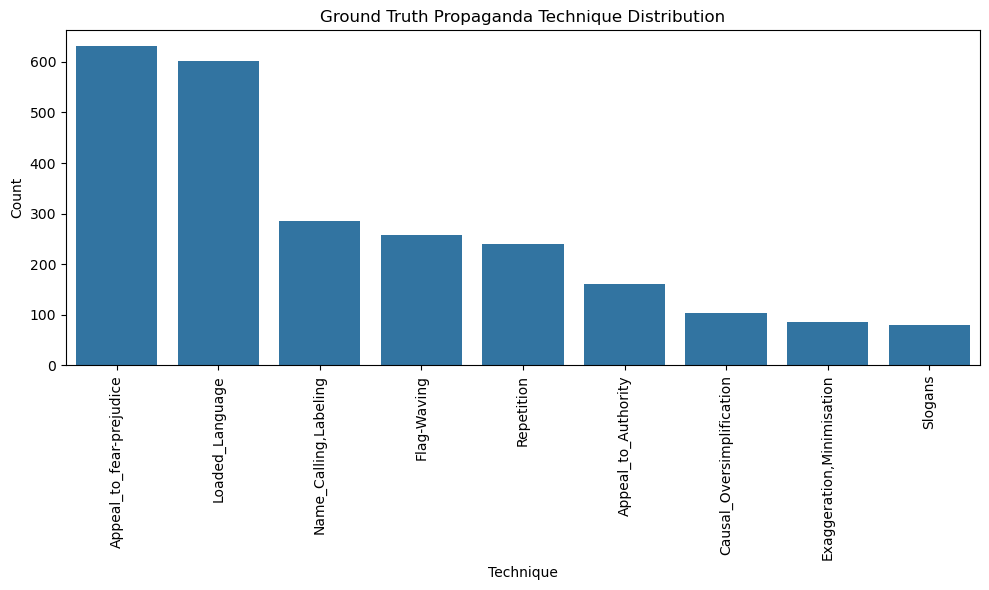

In [35]:
def convert_to_token_level_evaluation(article_results):
    """
    Convert span-based predictions to token-level for evaluation.
    This is a simplification - ideally we'd use more sophisticated span matching.
    """
    all_gt_labels = []
    all_pred_labels = []
    
    for result in article_results:
        text = result['text']
        token_labels = ['O'] * len(text)  # Initialize all tokens as 'O' (outside)
        
        # Fill in ground truth labels
        for technique in result['ground_truth_techniques']:
            for i in range(technique['start'], technique['end']):
                token_labels[i] = technique['technique']
        
        # Create predicted labels
        pred_labels = ['O'] * len(text)  # Initialize all tokens as 'O' (outside)
        for pred in result['gliner_predictions']:
            # Find span in original text (this is an approximation)
            pred_text = pred['text']
            start_idx = text.find(pred_text)
            if start_idx != -1:
                end_idx = start_idx + len(pred_text)
                for i in range(start_idx, end_idx):
                    pred_labels[i] = pred['label']
        
        # Add to overall lists
        all_gt_labels.extend(token_labels)
        all_pred_labels.extend(pred_labels)
    
    return all_gt_labels, all_pred_labels

# Evaluate GLiNER performance
gt_labels, pred_labels = convert_to_token_level_evaluation(sample_results)

# Filter to only include tokens with labels (for better evaluation)
filtered_gt = []
filtered_pred = []
for gt, pred in zip(gt_labels, pred_labels):
    if gt != 'O' or pred != 'O':
        filtered_gt.append(gt)
        filtered_pred.append(pred)

# Print classification report
print("\nClassification Report (for labeled tokens only):")
print(classification_report(filtered_gt, filtered_pred))

# Visualize results
plt.figure(figsize=(10, 6))
counts = Counter(filtered_gt)
df = pd.DataFrame({
    'Technique': list(counts.keys()),
    'Count': list(counts.values())
})
sns.barplot(data=df.sort_values('Count', ascending=False), x='Technique', y='Count')
plt.xticks(rotation=90)
plt.title('Ground Truth Propaganda Technique Distribution')
plt.tight_layout()
plt.show()

# detailed analysis of a single article

In [36]:
def analyze_article_in_detail(article_id, model, labels):
    """Run detailed analysis on a single article."""
    result = run_gliner_on_article(article_id, model, labels)
    
    # Create a visualization of spans
    text = result['text']
    gt_techniques = result['ground_truth_techniques']
    predictions = result['gliner_predictions']
    
    print(f"Article ID: {article_id}")
    print(f"Article length: {len(text)} characters")
    print(f"Number of ground truth techniques: {len(gt_techniques)}")
    print(f"Number of GLiNER predictions: {len(predictions)}")
    
    # Print a sample of ground truth and predictions side by side
    print("\nGround Truth vs GLiNER Predictions (sample):")
    print("=" * 80)
    print(f"{'Ground Truth':<40} | {'GLiNER Prediction':<40}")
    print("-" * 80)
    
    for i in range(min(10, max(len(gt_techniques), len(predictions)))):
        gt_text = gt_techniques[i]['text'] if i < len(gt_techniques) else ""
        gt_label = gt_techniques[i]['technique'] if i < len(gt_techniques) else ""
        
        pred_text = predictions[i]['text'] if i < len(predictions) else ""
        pred_label = predictions[i]['label'] if i < len(predictions) else ""
        
        print(f"{gt_text[:30]:<30} ({gt_label:<10}) | {pred_text[:30]:<30} ({pred_label:<10})")
    
    return result

# Run detailed analysis on one article
detailed_result = analyze_article_in_detail(article_ids[0], model, propaganda_labels)

/Users/home/miniconda3/envs/266/lib/python3.10/site-packages/gliner/data_processing/processor.py:410: UserWarning: Sentence of length 1264 has been truncated to 1024
  warnings.warn(f"Sentence of length {len(tokens)} has been truncated to {max_len}")


Article ID: article701225819
Article length: 6254 characters
Number of ground truth techniques: 28
Number of GLiNER predictions: 0

Ground Truth vs GLiNER Predictions (sample):
Ground Truth                             | GLiNER Prediction                       
--------------------------------------------------------------------------------
hatemonger                     (Name_Calling,Labeling) |                                (          )
Satan                          (Repetition) |                                (          )
Satan                          (Repetition) |                                (          )
grotesque                      (Loaded_Language) |                                (          )
white supremacist icon         (Name_Calling,Labeling) |                                (          )
“Jewish Zionist Agent.”        (Name_Calling,Labeling) |                                (          )
venomous                       (Loaded_Language) |                              

# improving gliner's perceptive field in support of open information extraction

In [37]:
def create_propaganda_technique_definitions():
    """Create definitions and examples for propaganda techniques."""
    return {
        "Appeal_to_Authority": {
            "definition": "Citing an authority/expert to support a claim without addressing the argument itself",
            "examples": ["As Dr. Smith, a renowned economist, has stated, this policy will devastate the economy"]
        },
        "Appeal_to_Fear-Prejudice": {
            "definition": "Using fear or prejudice to manipulate emotions rather than using logic",
            "examples": ["If we don't act now, terrorists could strike anywhere, anytime"]
        },
        "Bandwagon": {
            "definition": "Appealing to popularity or the fact that many people do something as validation",
            "examples": ["Everyone is buying this product, so should you"]
        },
        "Black-and-White_Fallacy": {
            "definition": "Presenting only two choices when others exist; simplifying complex issues",
            "examples": ["Either you support this bill, or you don't care about children's safety"]
        },
        "Causal_Oversimplification": {
            "definition": "Assuming a single cause for a complex issue",
            "examples": ["Crime rates are rising because video games are too violent"]
        },
        "Doubt": {
            "definition": "Questioning the credibility of established facts to create uncertainty",
            "examples": ["Scientists still aren't sure if climate change is real"]
        },
        "Exaggeration-Minimisation": {
            "definition": "Representing something in an excessive manner or making something seem less important",
            "examples": ["This is the greatest threat our nation has ever faced", "It's just a minor policy change"]
        },
        "Flag-Waving": {
            "definition": "Appealing to patriotism or national identity to justify actions",
            "examples": ["As Americans, we must support this policy to protect our way of life"]
        },
        "Loaded_Language": {
            "definition": "Using words with strong emotional implications to influence an audience",
            "examples": ["The brutal regime crushed the hopes of innocent citizens"]
        },
        "Name_Calling-Labeling": {
            "definition": "Attaching a negative label to a person or group",
            "examples": ["These radical extremists want to destroy our values"]
        },
        "Obfuscation-Intentional_Vagueness-Confusion": {
            "definition": "Using unclear expressions, technical jargon to confuse and deceive",
            "examples": ["Our advanced proprietary algorithms optimize synergistic outcomes"]
        },
        "Red_Herring": {
            "definition": "Introducing irrelevant material to distract from the main issue",
            "examples": ["Instead of discussing healthcare, let's talk about the senator's vacation home"]
        },
        "Reductio_ad_Hitlerum": {
            "definition": "Comparing an opponent to Hitler/Nazis to discredit them",
            "examples": ["These policies remind me of Nazi Germany"]
        },
        "Repetition": {
            "definition": "Repeating the same message over and over to make it stick",
            "examples": ["We need change. Change is coming. Change will happen."]
        },
        "Slogans": {
            "definition": "Using a brief, striking phrase that is easy to remember",
            "examples": ["Make America Great Again", "Yes We Can"]
        },
        "Thought-terminating_Cliché": {
            "definition": "Using a commonly used phrase to end an argument and dismiss valid concerns",
            "examples": ["It is what it is", "That's just the way things are"]
        },
        "Straw_Man": {
            "definition": "Misrepresenting someone's argument to make it easier to attack",
            "examples": ["You want healthcare reform? So you want socialism and government control"]
        },
        "Whataboutism": {
            "definition": "Deflecting criticism by pointing to someone else's wrongdoing",
            "examples": ["Why focus on our corruption when they are doing the same thing?"]
        }
    }

def enrich_labels_for_gliner(propaganda_labels):
    """Create enriched labels with definitions for GLiNER."""
    definitions = create_propaganda_technique_definitions()
    enriched_labels = []
    
    for label in propaganda_labels:
        if label in definitions:
            # Format: "Label: definition. Example: example"
            enriched_label = f"{label}: {definitions[label]['definition']}. Example: {definitions[label]['examples'][0]}"
            enriched_labels.append(enriched_label)
        else:
            enriched_labels.append(label)
    
    return enriched_labels

# Create enriched labels for GLiNER
enriched_propaganda_labels = enrich_labels_for_gliner(propaganda_labels)

# Print sample of enriched labels
print("Sample of enriched labels for GLiNER:")
for label in enriched_propaganda_labels[:3]:
    print(f"- {label}")

Sample of enriched labels for GLiNER:
- Appeal_to_Authority: Citing an authority/expert to support a claim without addressing the argument itself. Example: As Dr. Smith, a renowned economist, has stated, this policy will devastate the economy
- Appeal_to_fear-prejudice
- Bandwagon,Reductio_ad_hitlerum


In [38]:
def run_gliner_on_article_with_enriched_labels(article_id, model, enriched_labels, original_labels):
    """Run GLiNER on a single article with enriched labels."""
    # Load article
    text = load_semeval_article(article_id)
    
    # Get ground truth
    gt_spans = load_semeval_spans(article_id)
    gt_techniques = load_semeval_techniques(article_id)
    
    # Add text to ground truth spans
    gt_spans = enrich_spans_with_text(text, gt_spans)
    gt_techniques = enrich_spans_with_text(text, gt_techniques)
    
    # Run GLiNER prediction with enriched labels
    predicted_entities = model.predict_entities(text, enriched_labels, threshold=0.3)  # Lower threshold for better recall
    
    # Map back to original labels for comparison
    for entity in predicted_entities:
        # Extract the original label from the enriched label (before the colon)
        entity['original_label'] = entity['label'].split(':')[0].strip()
    
    return {
        'article_id': article_id,
        'text': text,
        'ground_truth_spans': gt_spans,
        'ground_truth_techniques': gt_techniques,
        'gliner_predictions': predicted_entities
    }

# Modify the analyze_article_in_detail function to use the enriched labels
def analyze_article_with_enriched_labels(article_id, model, enriched_labels, original_labels):
    """Run detailed analysis on a single article using enriched labels."""
    result = run_gliner_on_article_with_enriched_labels(article_id, model, enriched_labels, original_labels)
    
    # Create a visualization of spans
    text = result['text']
    gt_techniques = result['ground_truth_techniques']
    predictions = result['gliner_predictions']
    
    print(f"Article ID: {article_id}")
    print(f"Article length: {len(text)} characters")
    print(f"Number of ground truth techniques: {len(gt_techniques)}")
    print(f"Number of GLiNER predictions: {len(predictions)}")
    
    # Print a sample of ground truth and predictions side by side
    print("\nGround Truth vs GLiNER Predictions (sample):")
    print("=" * 100)
    print(f"{'Ground Truth':<40} | {'GLiNER Prediction':<60}")
    print("-" * 100)
    
    for i in range(min(10, max(len(gt_techniques), len(predictions)))):
        gt_text = gt_techniques[i]['text'] if i < len(gt_techniques) else ""
        gt_label = gt_techniques[i]['technique'] if i < len(gt_techniques) else ""
        
        pred_text = predictions[i]['text'] if i < len(predictions) else ""
        pred_label = predictions[i]['original_label'] if i < len(predictions) else ""
        pred_confidence = predictions[i]['score'] if i < len(predictions) else 0
        
        print(f"{gt_text[:30]:<30} ({gt_label:<10}) | {pred_text[:40]:<40} ({pred_label:<10}, {pred_confidence:.2f})")
    
    return result

# Run the improved analysis
improved_result = analyze_article_with_enriched_labels(
    article_ids[0], 
    model, 
    enriched_propaganda_labels,
    propaganda_labels
)

Article ID: article701225819
Article length: 6254 characters
Number of ground truth techniques: 28
Number of GLiNER predictions: 0

Ground Truth vs GLiNER Predictions (sample):
Ground Truth                             | GLiNER Prediction                                           
----------------------------------------------------------------------------------------------------
hatemonger                     (Name_Calling,Labeling) |                                          (          , 0.00)
Satan                          (Repetition) |                                          (          , 0.00)
Satan                          (Repetition) |                                          (          , 0.00)
grotesque                      (Loaded_Language) |                                          (          , 0.00)
white supremacist icon         (Name_Calling,Labeling) |                                          (          , 0.00)
“Jewish Zionist Agent.”        (Name_Calling,Labeling) |     

In [39]:
def process_in_chunks(text, chunk_size=500, overlap=200):
    """Process text in overlapping chunks."""
    chunks = []
    for i in range(0, len(text), chunk_size - overlap):
        chunk = text[i:i + chunk_size]
        if len(chunk) > 20:  # Avoid tiny chunks
            chunks.append((i, chunk))
    return chunks

def run_gliner_with_chunking(article_id, model, enriched_labels):
    """Run GLiNER with text chunking for better context."""
    text = load_semeval_article(article_id)
    chunks = process_in_chunks(text)
    
    all_predictions = []
    for start_idx, chunk in chunks:
        chunk_predictions = model.predict_entities(chunk, enriched_labels, threshold=0.3)
        
        # Adjust start positions
        for pred in chunk_predictions:
            # Find the span in original text to get correct position
            pred_start = text.find(pred['text'], start_idx)
            if pred_start >= 0:
                pred['start'] = pred_start
                pred['end'] = pred_start + len(pred['text'])
                pred['original_label'] = pred['label'].split(':')[0].strip()
                all_predictions.append(pred)
    
    return all_predictions